In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<ipython-input-80-a64c200a01a4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
<ipython-input-80-a64c200a01a4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==0].A

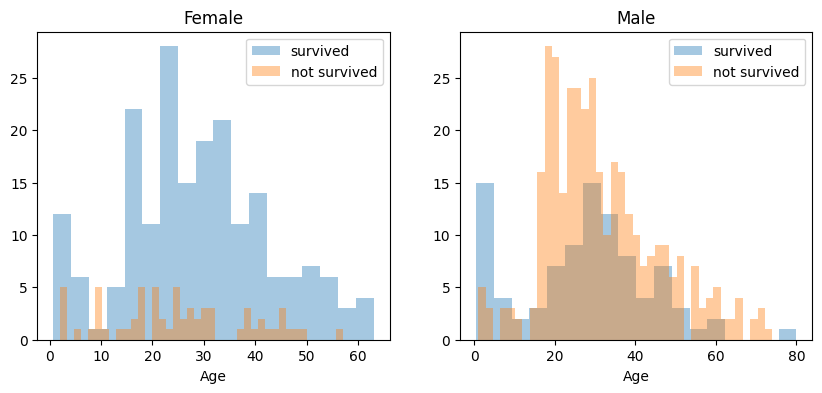

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


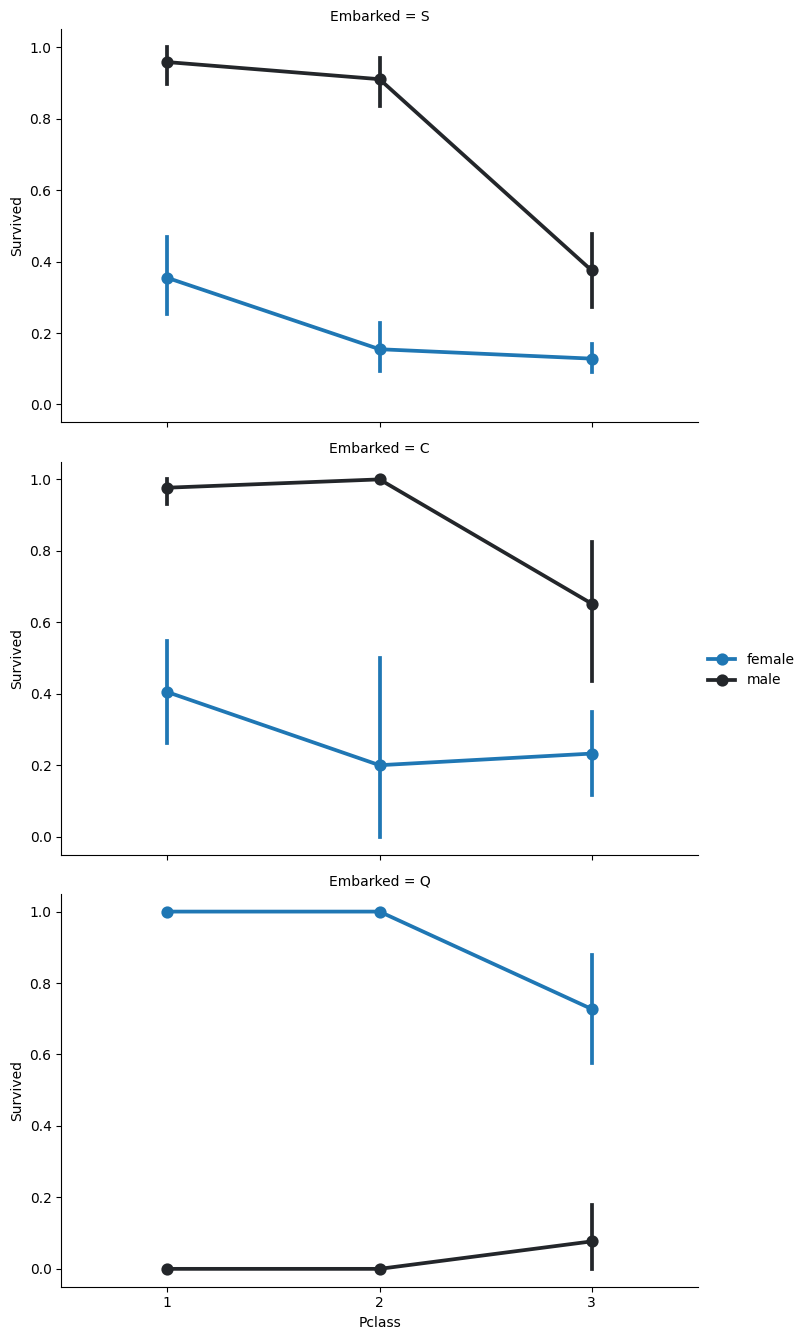

In [ ]:
FacetGrid = sns.FacetGrid(df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

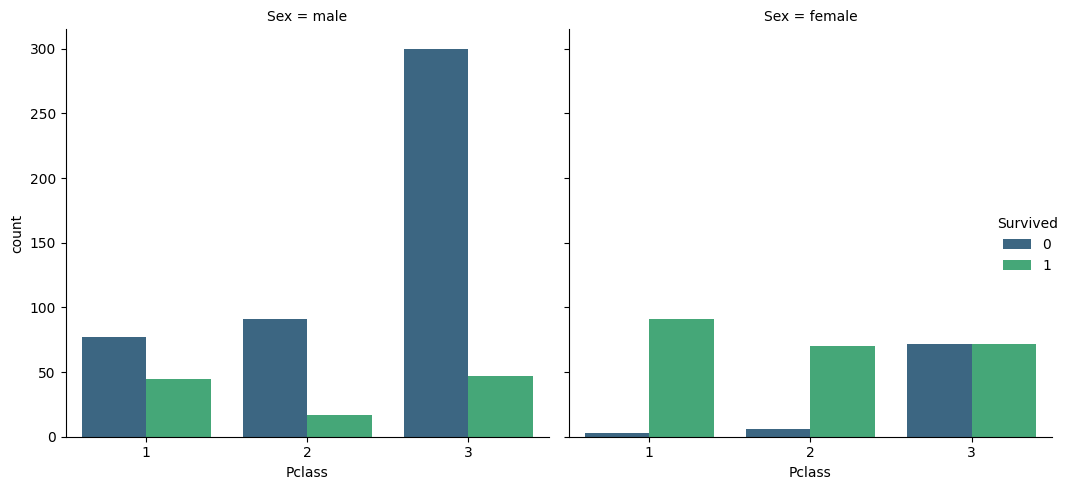

In [ ]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data =df,palette='viridis' )
plt.tight_layout()

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
data = [df,df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

<ipython-input-86-ec09e3fa92f0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=df,palette='viridis',)


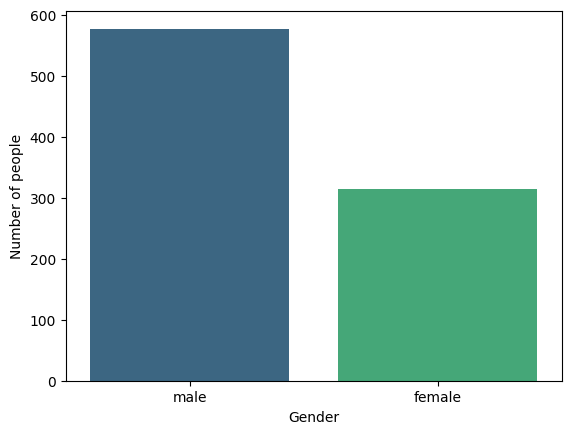

In [ ]:
sns.countplot(x='Sex',data=df,palette='viridis',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

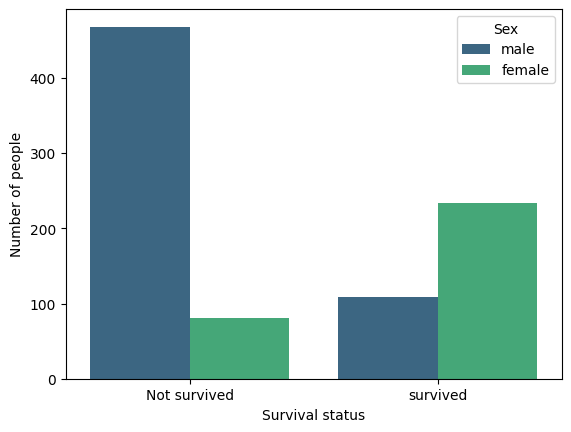

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

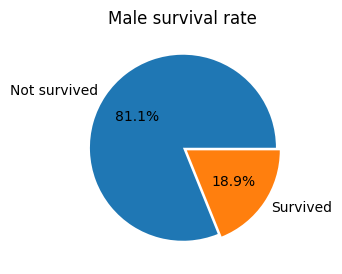

In [ ]:
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Male survival rate")
plt.show()

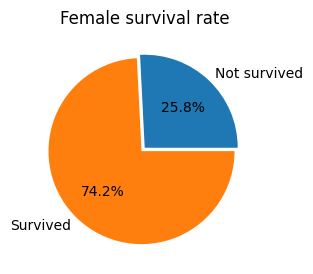

In [ ]:
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Female survival rate")
plt.show()

In [ ]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<ipython-input-91-671bae95409f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='viridis',)


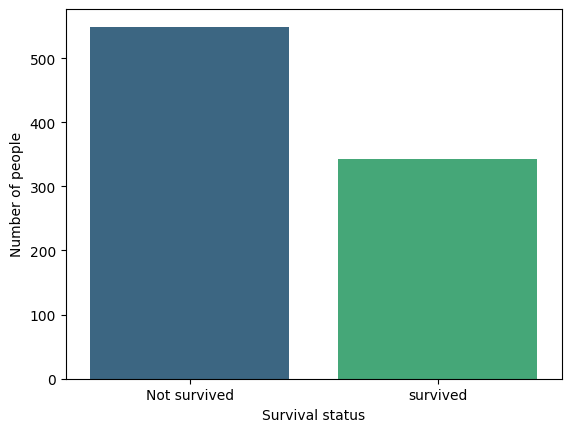

In [ ]:
sns.countplot(x='Survived',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

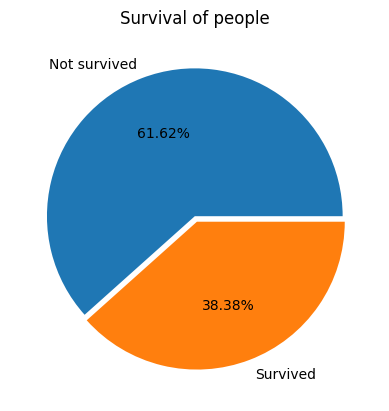

In [ ]:
plt.pie(df['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not survived','Survived'])
plt.title("Survival of people")
plt.show()

<ipython-input-93-b3e587159086>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass',data=df,palette='viridis',)


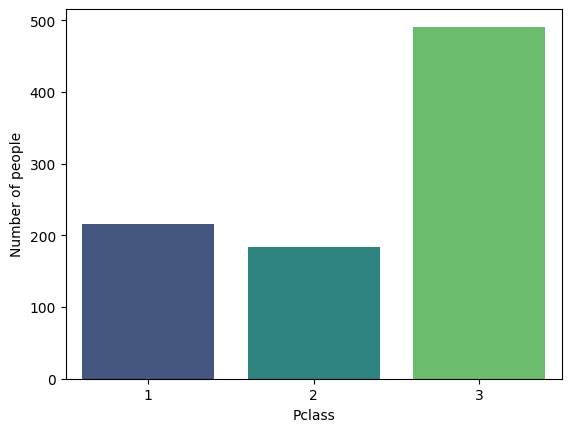

In [ ]:
sns.countplot(x='Pclass',data=df,palette='viridis',)
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()

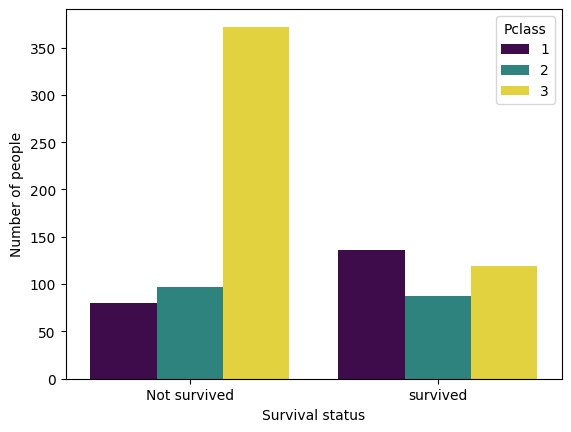

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

In [ ]:
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [df, df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  relatives    891 non-null    int64  
 13  not_alone    891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [ ]:
data = [df, df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
genders = {"male": 0, "female": 1}
data = [df,df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
data = [df,df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
df = df.drop(['Name'], axis=1)

In [ ]:
df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
df = df.drop(['Ticket'], axis=1)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df,df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

<ipython-input-104-e795e6be1e80>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked',data=df,palette='coolwarm',)
<ipython-input-104-e795e6be1e80>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x='Embarked',data=df,palette='coolwarm',)


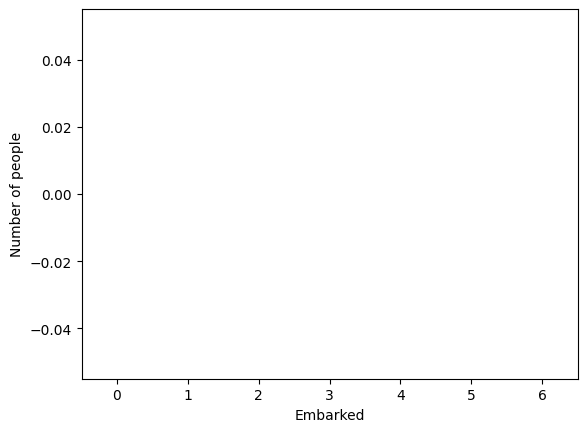

In [ ]:
sns.countplot(x='Embarked',data=df,palette='coolwarm',)
plt.xlabel("Embarked")
plt.ylabel("Number of people")
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

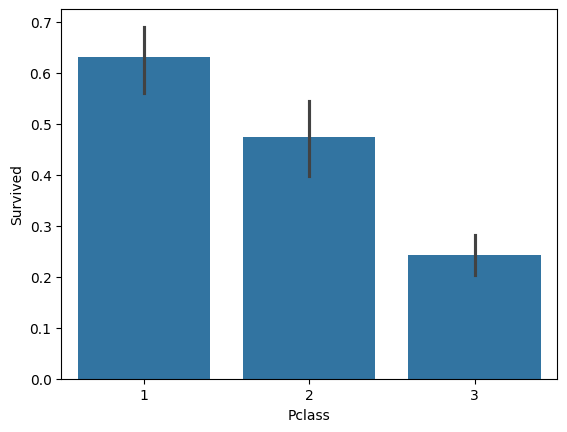

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)

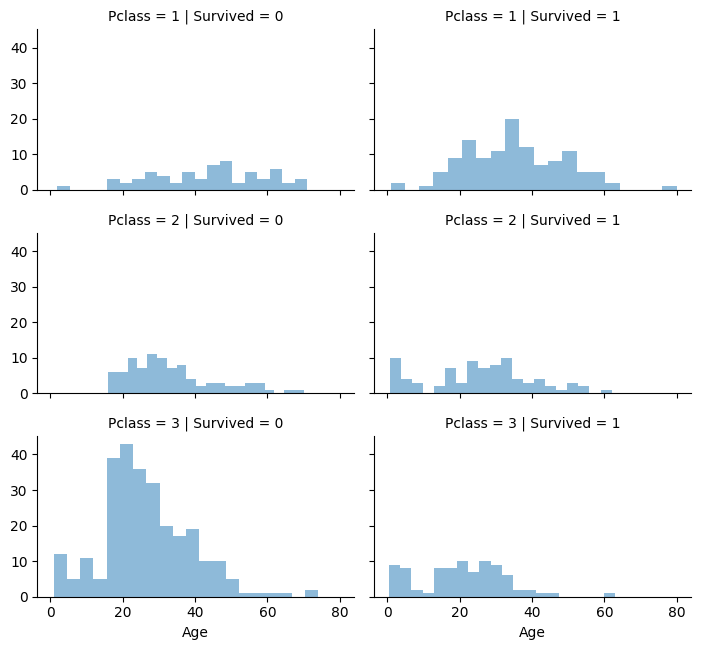

In [ ]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<ipython-input-107-3a7fef3deebb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=df,ax=axes[0],palette='husl')
<ipython-input-107-3a7fef3deebb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch',data=df,ax=axes[1],palette='husl')


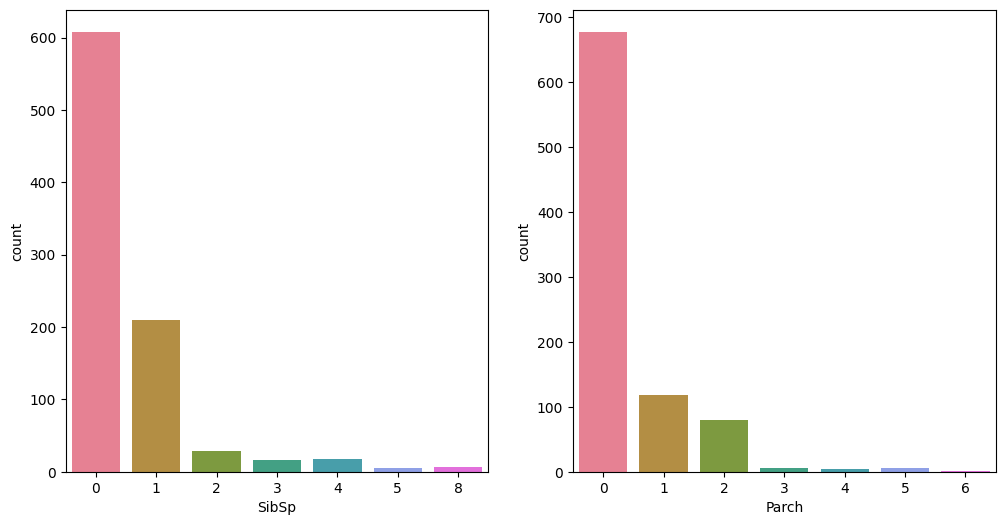

In [ ]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=df,ax=axes[0],palette='husl')
sns.countplot(x='Parch',data=df,ax=axes[1],palette='husl')
plt.show()

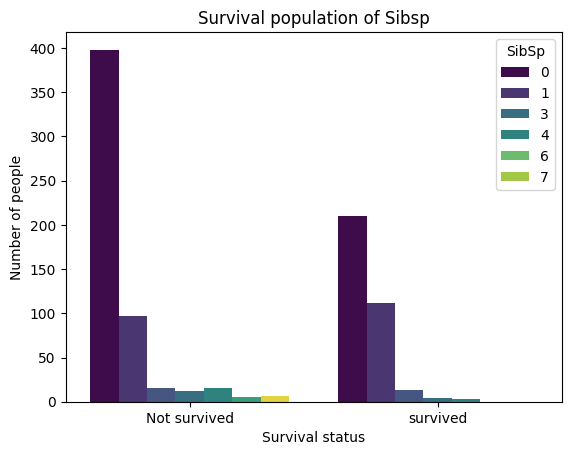

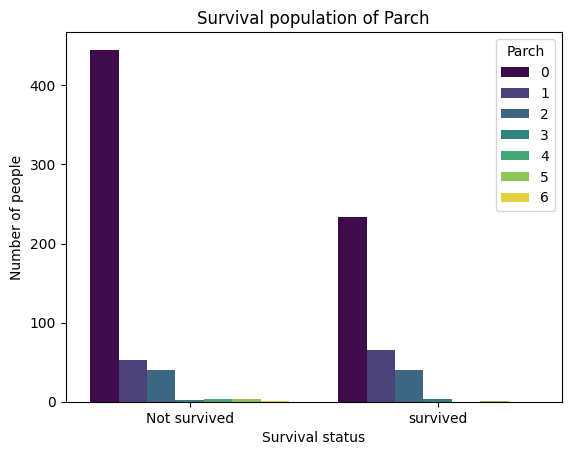

In [ ]:
sns.countplot(x ='Survived', hue='SibSp',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.show()

sns.countplot(x ='Survived',hue='Parch',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()

In [ ]:
dataset_list = [df,df]
for dataset in dataset_list:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()


not_alone
1    537
0    354
Name: count, dtype: int64

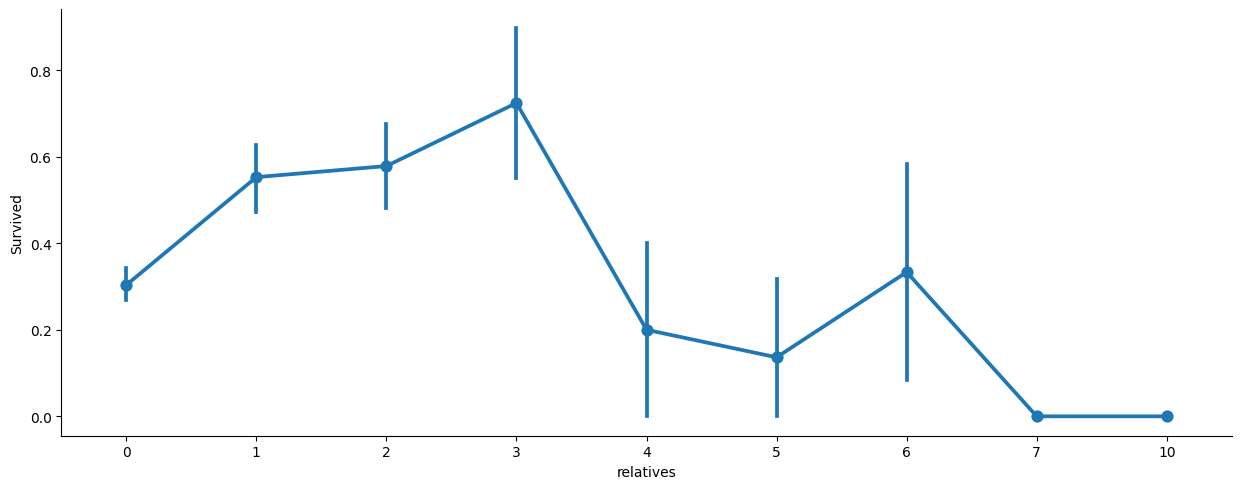

In [ ]:
axes = sns.catplot(x='relatives', y='Survived', data=df, aspect=2.5, kind='point')

In [ ]:
# Check if 'PassengerId' is in the DataFrame's columns
if 'PassengerId' in df.columns:
    df = df.drop(['PassengerId'], axis=1)
    print("Column 'PassengerId' dropped.")
else:
    print("Column 'PassengerId' not found in the DataFrame.")

Column 'PassengerId' dropped.


In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df,df]

for dataset in data:
    # Check if 'Cabin' column exists before processing
    if 'Cabin' in dataset.columns:
        dataset['deck'] = dataset['Cabin'].fillna("U0")
        # Handle potential NaN values within the lambda function
        dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(str(x)).group() if re.compile("([a-zA-Z]+)").search(str(x)) else 'U')
        dataset['Deck'] = dataset['Deck'].map(deck)
        dataset['Deck'] = dataset['Deck'].fillna(0)
        dataset['Deck'] = dataset['Deck'].astype(int)
        # Now drop the 'Cabin' feature
        dataset = dataset.drop(['Cabin'], axis=1)
    else:
        print("Column 'Cabin' not found in the DataFrame.")

In [ ]:
data = [df,df]

for dataset in data:
    mean = df["Age"].mean()
    std = df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df["Age"].astype(int)
df["Age"].isnull().sum()

0

In [ ]:
genders = {"male": 0, "female": 1}
data = [df,df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
data = [df,df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
print(df['Age'])

# let's see how it's distributed df['Age'].value_counts()

0      2
1      5
2      3
3      5
4      5
      ..
886    3
887    2
888    6
889    3
890    4
Name: Age, Length: 891, dtype: int64


In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Title,deck,Deck
0,0,3,NaN,2,1,0,7,NaN,NaN,1,0,1,U0,0
1,1,1,NaN,5,1,0,71,C85,NaN,1,0,3,C85,3
2,1,3,NaN,3,0,0,7,NaN,NaN,0,1,2,U0,0
3,1,1,NaN,5,1,0,53,C123,NaN,1,0,3,C123,3
4,0,3,NaN,5,0,0,8,NaN,NaN,0,1,1,U0,0
5,0,3,NaN,6,0,0,8,NaN,NaN,0,1,1,U0,0
6,0,1,NaN,6,0,0,51,E46,NaN,0,1,1,E46,5
7,0,3,NaN,0,3,1,21,NaN,NaN,4,0,4,U0,0
8,1,3,NaN,3,0,2,11,NaN,NaN,2,0,3,U0,0
9,1,2,NaN,1,1,0,30,NaN,NaN,1,0,3,U0,0


In [ ]:
data = [df,df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
data = [df,df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Title,deck,Deck,Age_Class,Fare_Per_Person
0,0,3,NaN,2,1,0,0,NaN,NaN,1,0,1,U0,0,6,0
1,1,1,NaN,5,1,0,3,C85,NaN,1,0,3,C85,3,5,1
2,1,3,NaN,3,0,0,0,NaN,NaN,0,1,2,U0,0,9,0
3,1,1,NaN,5,1,0,3,C123,NaN,1,0,3,C123,3,5,1
4,0,3,NaN,5,0,0,1,NaN,NaN,0,1,1,U0,0,15,1
5,0,3,NaN,6,0,0,1,NaN,NaN,0,1,1,U0,0,18,1
6,0,1,NaN,6,0,0,3,E46,NaN,0,1,1,E46,5,6,3
7,0,3,NaN,0,3,1,2,NaN,NaN,4,0,4,U0,0,0,0
8,1,3,NaN,3,0,2,1,NaN,NaN,2,0,3,U0,0,9,0
9,1,2,NaN,1,1,0,2,NaN,NaN,1,0,3,U0,0,2,1


In [ ]:
data = [df,df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Title,deck,Deck,Age_Class,Fare_Per_Person
0,0,3,NaN,2,1,0,0,NaN,NaN,1,0,1,U0,0,6,0
1,1,1,NaN,5,1,0,3,C85,NaN,1,0,3,C85,3,5,1
2,1,3,NaN,3,0,0,0,NaN,NaN,0,1,2,U0,0,9,0
3,1,1,NaN,5,1,0,3,C123,NaN,1,0,3,C123,3,5,1
4,0,3,NaN,5,0,0,1,NaN,NaN,0,1,1,U0,0,15,1
5,0,3,NaN,6,0,0,1,NaN,NaN,0,1,1,U0,0,18,1
6,0,1,NaN,6,0,0,3,E46,NaN,0,1,1,E46,5,6,3
7,0,3,NaN,0,3,1,2,NaN,NaN,4,0,4,U0,0,0,0
8,1,3,NaN,3,0,2,1,NaN,NaN,2,0,3,U0,0,9,0
9,1,2,NaN,1,1,0,2,NaN,NaN,1,0,3,U0,0,2,1


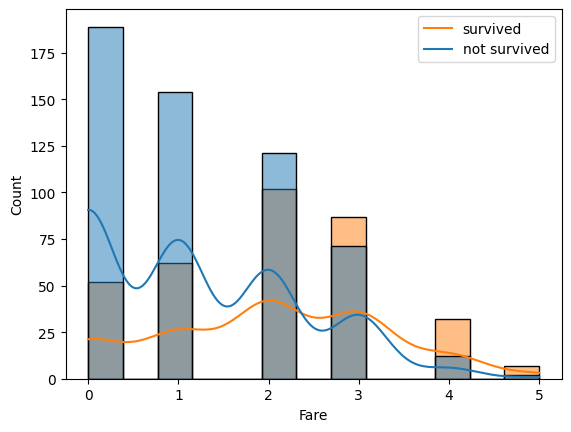

In [ ]:
sns.histplot(x='Fare',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

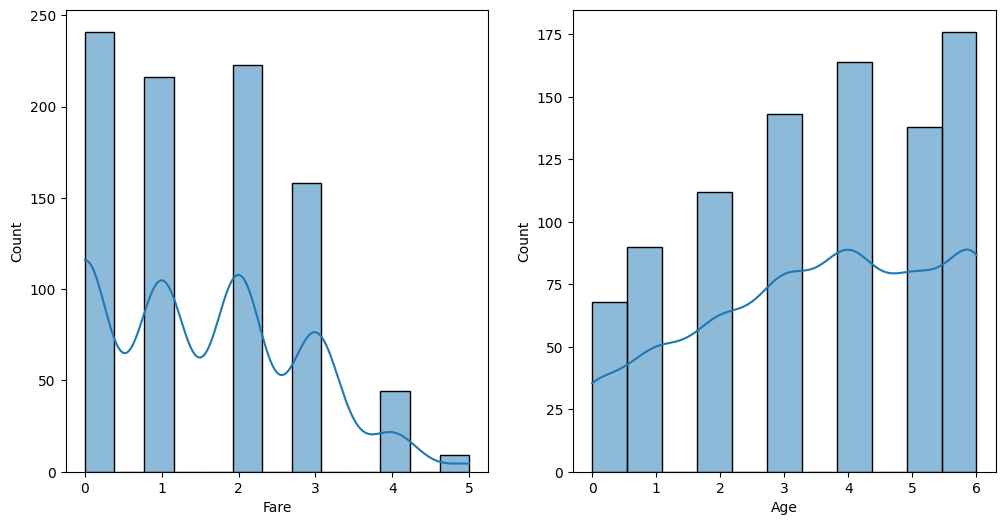

In [ ]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['Fare'], kde=True,ax=axes[0])
sns.histplot(df['Age'].dropna(),kde=True,ax=axes[1])
plt.show()

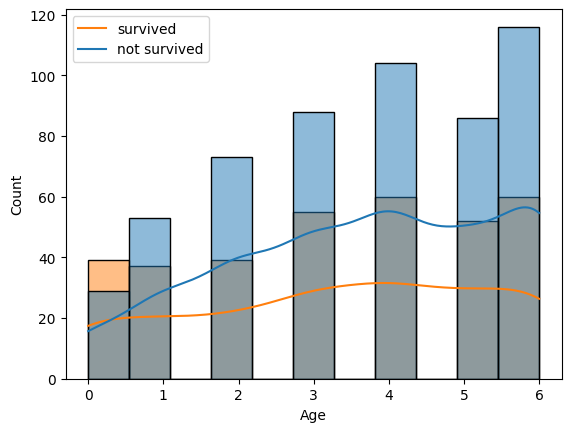

In [ ]:
sns.histplot(x='Age',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,not_alone,Title,deck,Deck,Age_Class,Fare_Per_Person
0,0,3,NaN,2,1,0,0,NaN,NaN,1,0,1,U0,0,6,0
1,1,1,NaN,5,1,0,3,C85,NaN,1,0,3,C85,3,5,1
2,1,3,NaN,3,0,0,0,NaN,NaN,0,1,2,U0,0,9,0
3,1,1,NaN,5,1,0,3,C123,NaN,1,0,3,C123,3,5,1
4,0,3,NaN,5,0,0,1,NaN,NaN,0,1,1,U0,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,NaN,3,0,0,1,NaN,NaN,0,1,5,U0,0,6,1
887,1,1,NaN,2,0,0,2,B42,NaN,0,1,2,B42,2,2,2
888,0,3,NaN,6,1,2,2,NaN,NaN,3,0,2,U0,0,18,0
889,1,1,NaN,3,0,0,2,C148,NaN,0,1,1,C148,3,3,2


In [ ]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
#Training Testing and Spliting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [ ]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train,Y_train) #fit the model on the training data
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

ValueError: could not convert string to float: 'C87'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, Y_train, Y_test are already defined

# Optionally scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_scaled, Y_train)

# Predict the labels on the test data
Y_pred = model.predict(X_test_scaled)

# Calculate and print the accuracy score
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))

ValueError: could not convert string to float: 'C87'

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[137  19]
 [ 78  34]]


In [ ]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

NameError: name 'pred_y' is not defined

In [ ]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

NameError: name 'y_pred2' is not defined

In [ ]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

In [ ]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)